<a href="https://colab.research.google.com/github/priyankav-27/PRODIGY_ML_01/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

# Load data from CSV file
file_path = '/content/drive/MyDrive/train.csv'
house_data = pd.read_csv(file_path)

# Display first few rows of the dataset
print(house_data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [15]:
# Extract features and target variable
X = house_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = house_data['SalePrice']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression

# Initialize linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


Training RMSE: 50924.807621834334
Testing RMSE: 52975.71771338122


In [19]:
# Example prediction for a new house
new_house = [[1800, 3, 2.5]]  # square footage, bedrooms, bathrooms
predicted_price = model.predict(new_house)
print("Predicted price for the new house:", predicted_price)


Predicted price for the new house: [234579.41544939]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


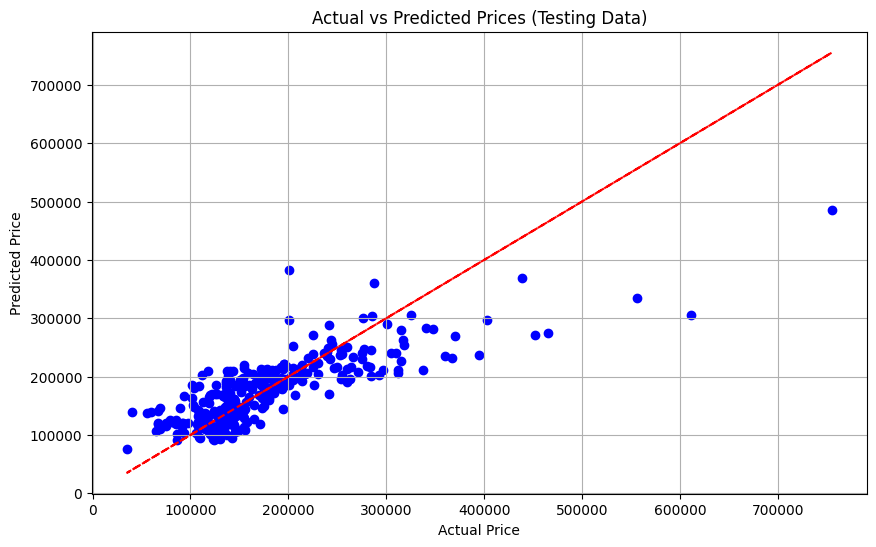

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.title('Actual vs Predicted Prices (Testing Data)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

<ipython-input-22-c63b8e9864e1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, color='blue', label='Actual Prices', shade=True)
<ipython-input-22-c63b8e9864e1>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred_test, color='orange', label='Predicted Prices', shade=True)


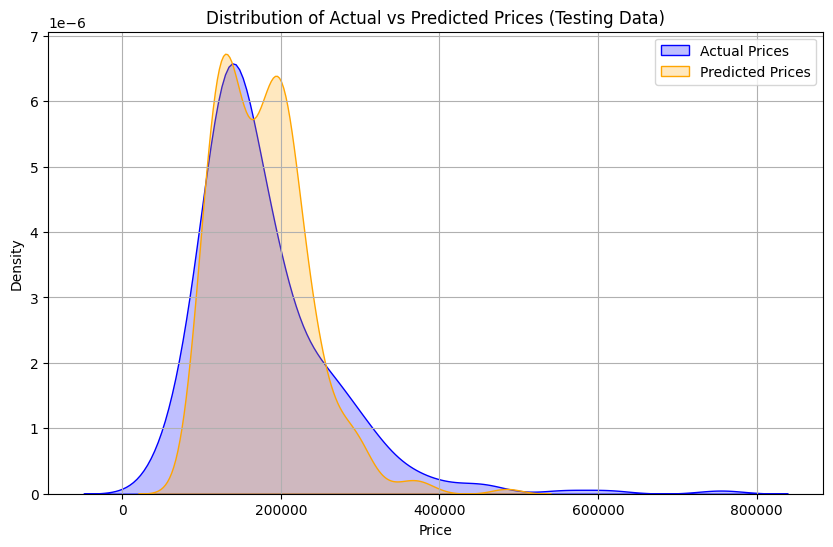

In [22]:
import seaborn as sns

# Plotting distribution of actual and predicted prices with KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='blue', label='Actual Prices', shade=True)
sns.kdeplot(y_pred_test, color='orange', label='Predicted Prices', shade=True)
plt.title('Distribution of Actual vs Predicted Prices (Testing Data)')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


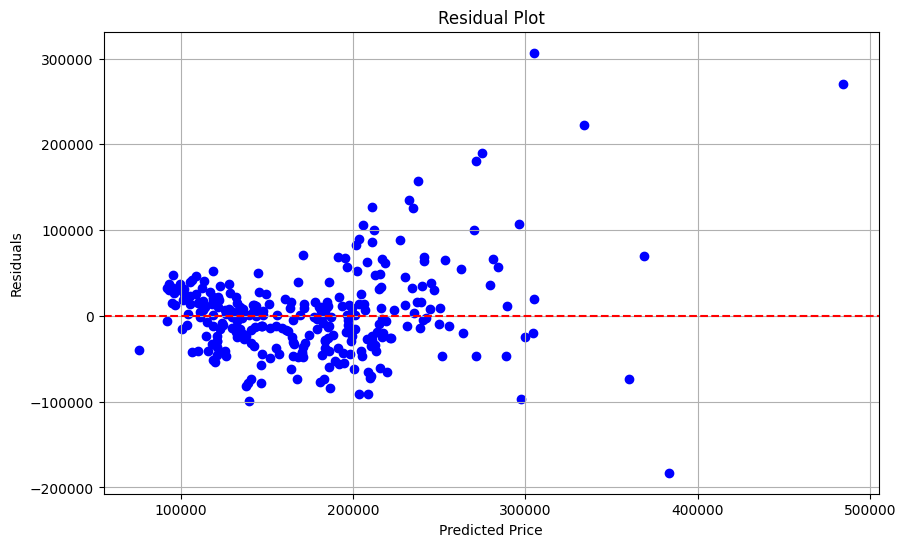

In [23]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred_test

# Plotting residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
